In [1]:
import warnings
warnings.filterwarnings('ignore')
from autoencoders import *
from pdb_utils import *
import pickle
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [2]:
import seaborn as sns; sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt

In [3]:
with open('pickle files/label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [4]:
with open('pickle files/fold_groups.pkl', 'rb') as f:
    fold_dict = pickle.load(f)

In [5]:
selected_folds = filter(lambda x: x[1]==2, map(lambda x: (x[0],len(x[1])), fold_dict.items()))[:10]

In [6]:
len(selected_folds)

10

In [7]:
structures = []

for fold,_ in selected_folds:
    for pdb in fold_dict[fold]:
        pdb_path = os.path.join("PDBs", pdb+".pdb")
        parser = PDB.PDBParser()
        structure = parser.get_structure(pdb, pdb_path)
        structures.append(structure)

In [7]:
matrixdict_s1 = DistanceMatrixDict(structures, resize_strategy="strategy1", resize_to=(64,64),removeSymmetry=True)

KeyboardInterrupt: 

In [ ]:
print "NUMBER OF PROTEINS: {}".format(len(matrixdict_s1.keys()))
print "PROTEINS VECTOR SIZE: {}".format(len(matrixdict_s1.values()[0]))

In [ ]:
X_train, y_train = [],[]

for protein,vector in matrixdict_s1.items():
    X_train.append(vector)
    y_train.append(label_dict[protein])
protein_names = matrixdict_s1.keys()

In [ ]:
print "NUMBER OF FOLDS: {}".format(len(selected_folds))
print "NUMBER OF FAMILIES: {}".format(len(set(y_train)))

## HEATMAP USING STRATEGY 1

In [28]:
input_size = len(X_train[0])
new_features, loss = LinearAutoencoder(X_train, input_size, 50, 100, learning_rate=0.0001)

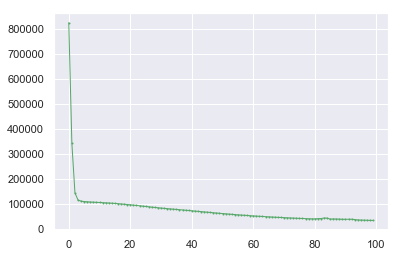

In [29]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [30]:
df = pd.DataFrame(new_features, index =y_train)

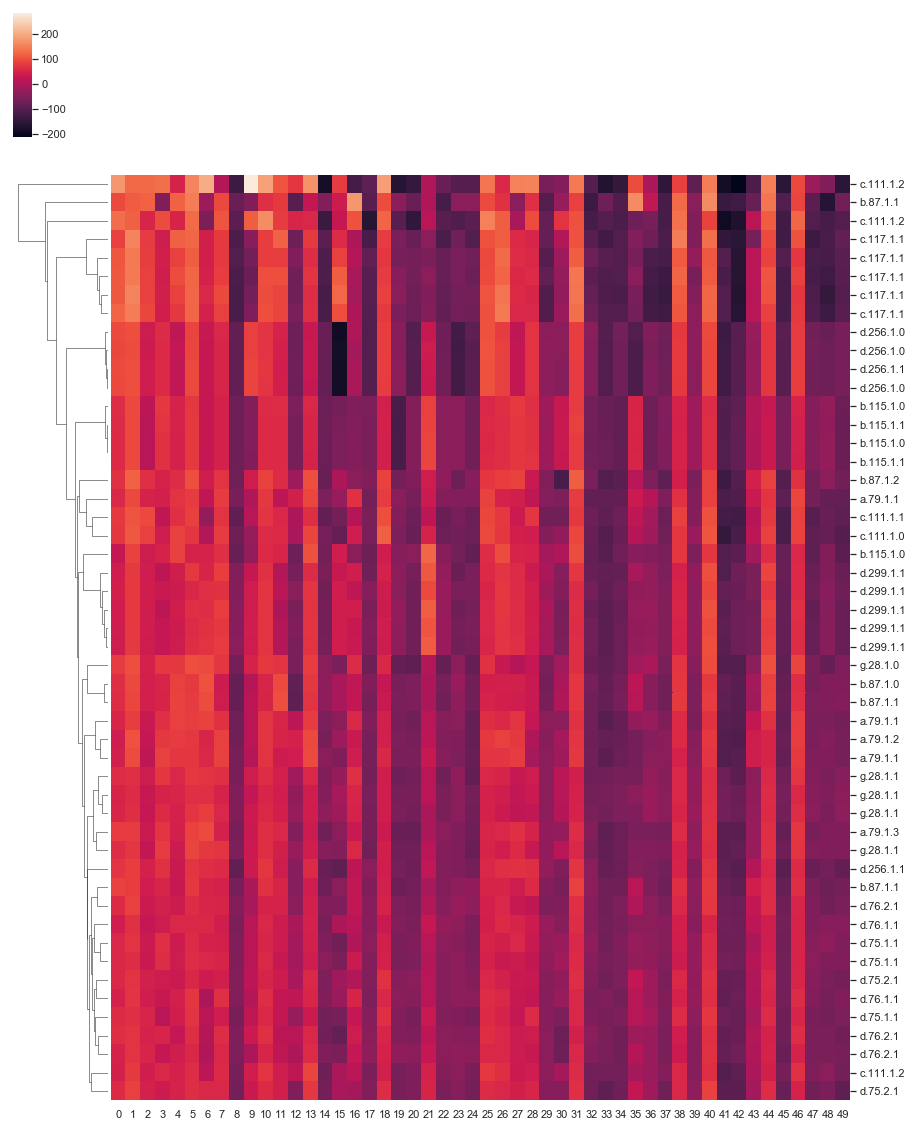

In [31]:
g = sns.clustermap(df, yticklabels=True, figsize=(15, 20), col_cluster=False)

#### PCA is used to decrease feature dimension (n=4)

In [32]:
pca = PCA(n_components=4)
features2d = pca.fit_transform(new_features)

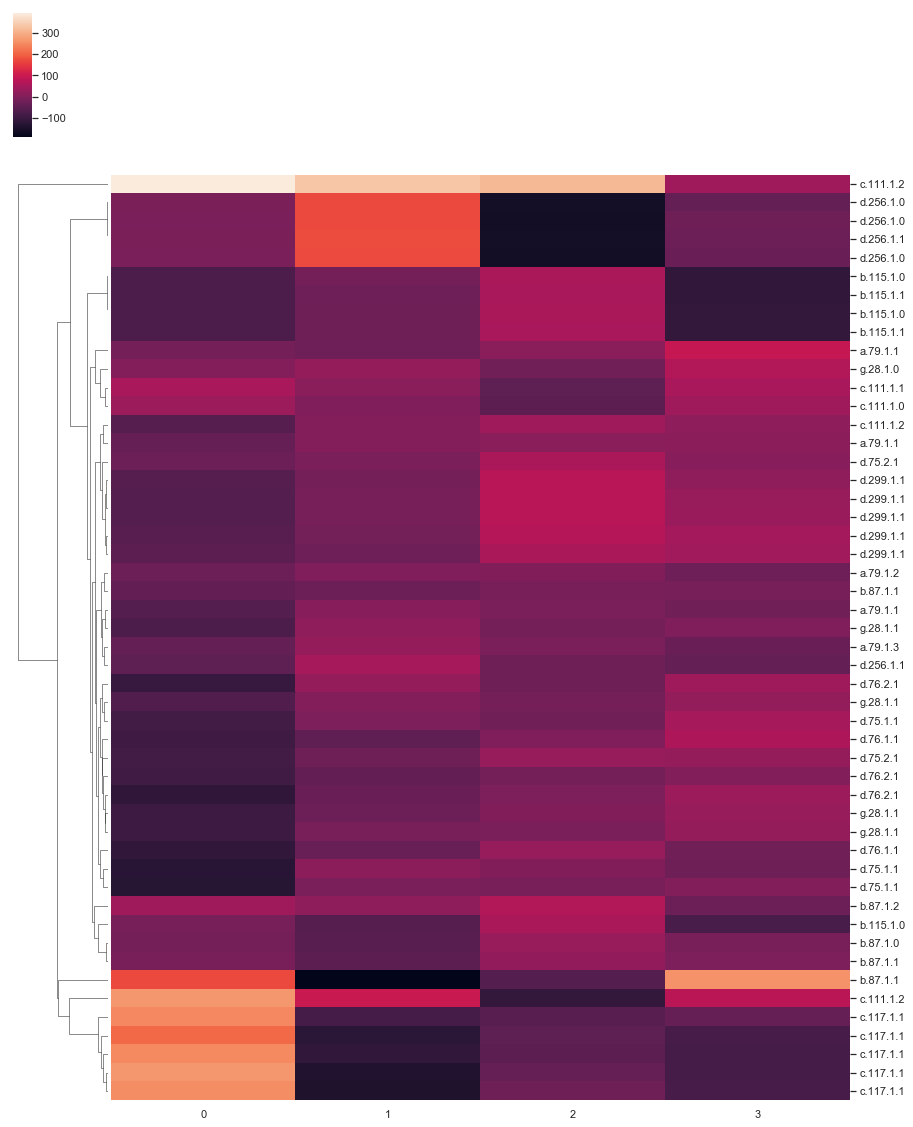

In [33]:
df = pd.DataFrame(features2d, index =y_train)
g = sns.clustermap(df, yticklabels=True, figsize=(15, 20), col_cluster=False)

## HEATMAP USING STRATEGY 2

In [8]:
matrixdict_s2 = DistanceMatrixDict(structures, resize_strategy="strategy2", resize_to=(64,64),sample_size=5)

In [9]:
len(matrixdict_s2.keys())

100

In [11]:
X_train, y_train = [],[]

for protein,vector in matrixdict_s2.items():
    X_train.append(vector)
    p = protein.split("sample")[0]
    try:
        label = label_dict[p] + "-" + protein.split("sample")[1]
    except:
        label = label_dict[p]
    y_train.append(label)
protein_names = matrixdict_s2.keys()

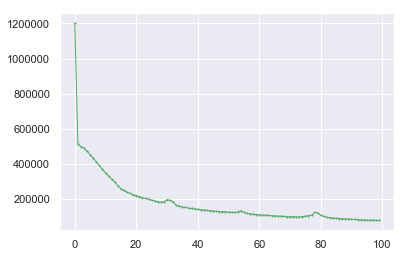

In [12]:
input_size = len(X_train[0])
new_features, loss = LinearAutoencoder(X_train, input_size, 50, 100, learning_rate=0.0001)
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [14]:
len(new_features)

100

In [15]:
new_feature_dict = {}
for i in enumerate(protein_names):
    if "sample" in i[1]:
        pdb = i[1].split("sample")[0]
        new_feature_dict.setdefault(pdb,[])
        new_feature_dict[pdb].append(new_features[i[0]])

In [17]:
len(new_feature_dict.keys())

20

In [18]:
X_train, y_train = [],[]

for pdb,vector in new_feature_dict.items():
    X_train.append(np.average(vector,axis=0))
    label = label_dict[pdb]
    y_train.append(label)

In [19]:
X_train[0].shape

(50,)

In [20]:
len(y_train)

20

In [21]:
df = pd.DataFrame(X_train, index =y_train)

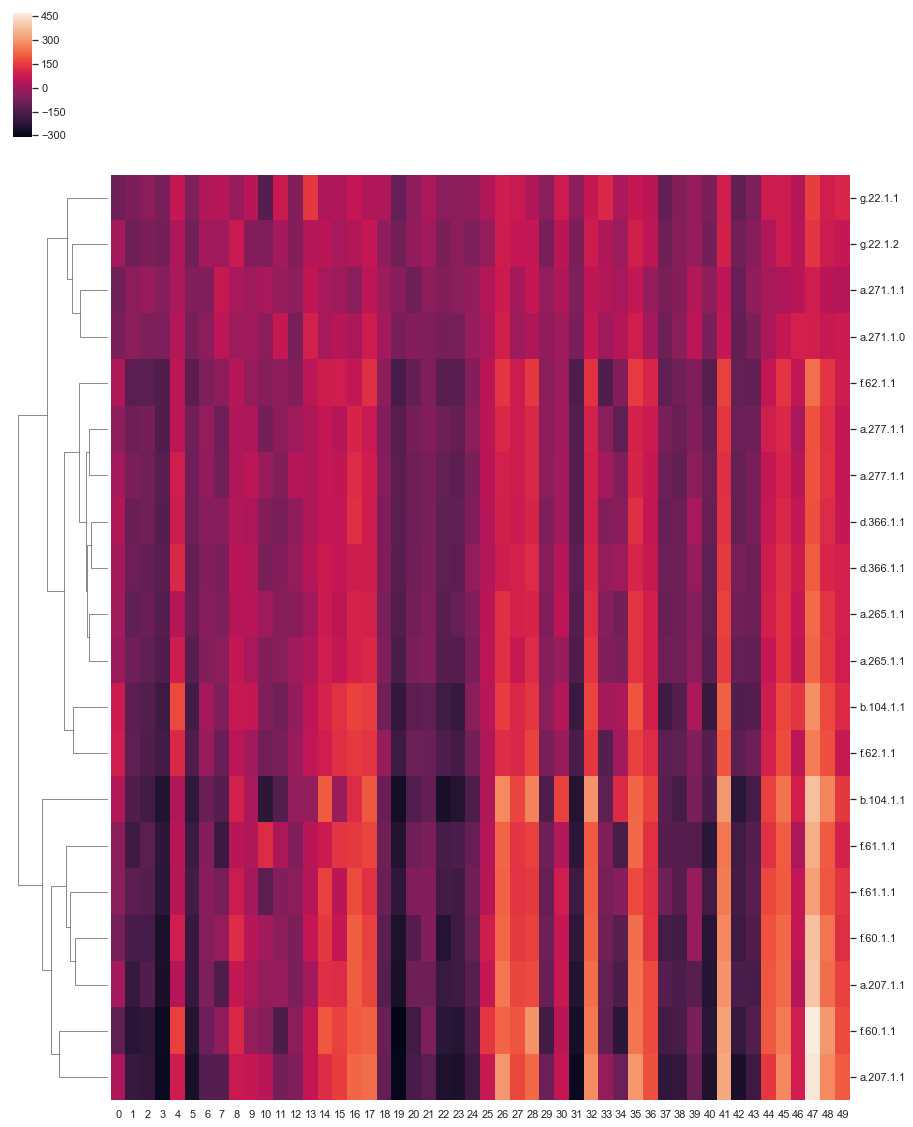

In [22]:
g = sns.clustermap(df, yticklabels=True, figsize=(15, 20), col_cluster=False)

#### PCA is used to decrease feature dimension (n=4)

In [23]:
pca = PCA(n_components=4)
features2d = pca.fit_transform(X_train)

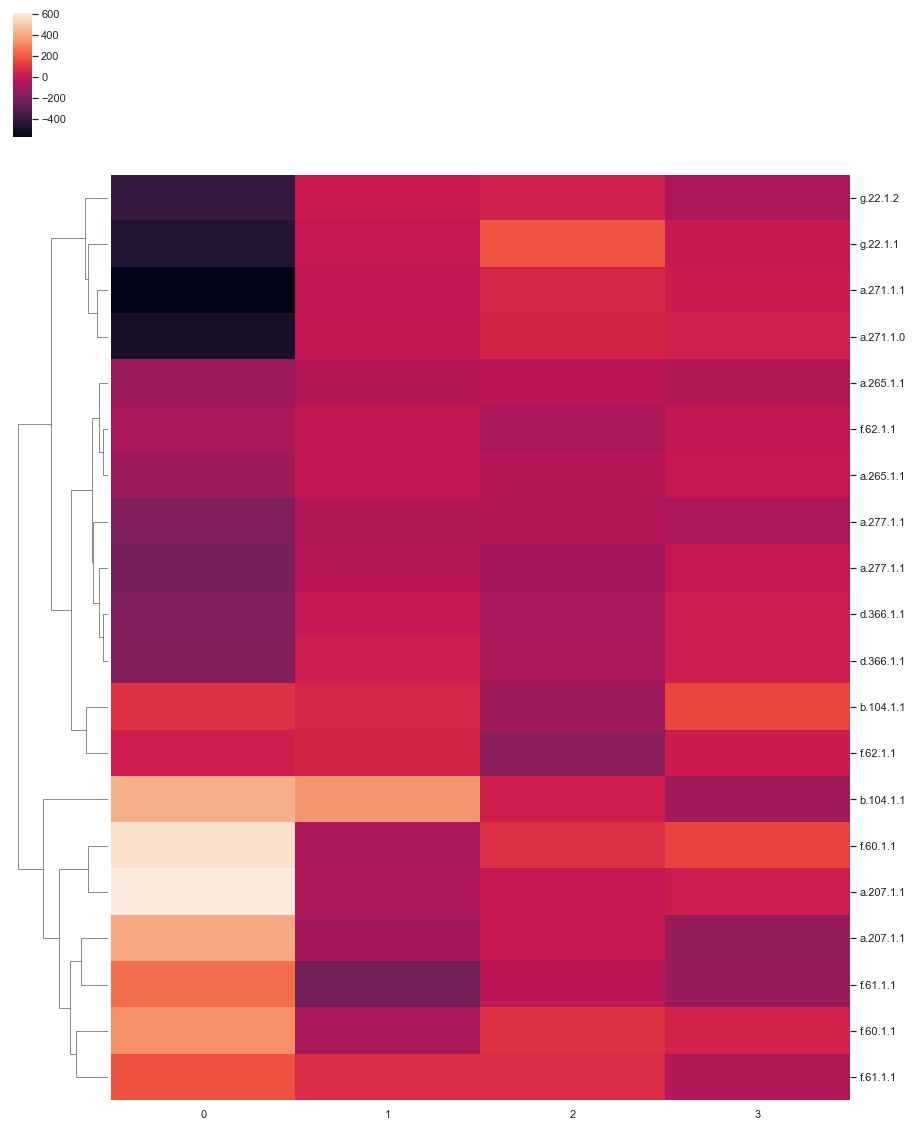

In [24]:
df = pd.DataFrame(features2d, index =y_train)
g = sns.clustermap(df, yticklabels=True, figsize=(15, 20), col_cluster=False)